# Исследование состояния выявления и лечения злокачественных образований в России

Заказчик из Министерства здравоохранения России ставит задачу:
- создать универсальный обработчик, который будет обрабатывать разрозненные файлы, предоставленых в формате .xls, без участия человека и сохранять обработанный результат в том или ином виде: обработанной сводной таблицы
- произвести анализ обработанных данных

Нам предоставлены файлы, содержащие в себе данные за 2021 год:
- Сведения о лечении злокачественных новообразований (ЗНО), впервые зарегистрированных в 2021 г. подлежащих радикальному лечению
- Сведения о контингенте больных со злокачественными новообразованиями, состоящем на учете в онкологических учреждениях в 2021 г.
- Заболеваемость населения территорий России злокачественными новообразованиями
- Смертность населения территорий России от злокачественных новообразований


**В исследовании:**
- В первой части исследования мы:
 - реализовали автоматизированную загрузку в рабочую папку предоставленных таблиц
 - объединили файлы, получили и выгрузили сводные датафреймы в рабочую папку в форматах .csv Excel

- Непосредственно сейчас мы проведем Исследовательский анализ полученных сводных данных.

**Ход исследования:**
- Загрузка обработанных данных 
- Исследовательский анализ данных
- Выводы и заключения


## Загрузка и подготовка данных к анализу


### Импортируем библиотеки:
- **pandas**  
- **matplotlib** - для построения графиков
- **seaborn** - также для построения графиков и диаграмм

In [24]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузим данные из csv-файла.

Сохраним данные в переменную **df**.  
В качестве разделителя столбцов используем соответствующий файлу тип - ```sep = ','```, используем его по умолчанию.

In [25]:
df = pd.read_csv('final_df_ZNO.csv')

#### Cтруктура файла:

| | | |
|:-----|:----|----:|
Регион | Регион| |
ФО | Федеральный округ| |
Пол пациента | Пол пациента| |
Абсолютное Число | Абсолютное число заболеваний данной локализации, выявленных в регионе| |
Показатель на 100 тыс. населения "грубый" | Используемый Заказчиком показатель | |
Показатель на 100 тыс. населения, стандартизованный | Используемый Заказчиком показатель | |
Показатель на 100 тыс. населения, ошибка | Используемый Заказчиком показатель | |
Индикатор | Присвоенный Заказчиком таблице индикатор | |
Локализация | Орган, в котором обнаружено заболевание | |
Таблица | Присвоенный Заказчиком таблице номер | |
Тип данных | Указывает на вид информации - Состояние онко поимощи (СОП) и Здокачественные новообразлвания(ЗНО ) | |

## Исследовательский анализ
Проведем небольшой анализ полученных сводных данных и выясним:
- Для заболеваемости:
 - какие заболевания (локализации) наиболее распостранены среди пациентов
 - какие из наиболее распостраненных локализаций наиболее характерны для мужчин, а какие - для женщин
- как распределены регионы по удельному показателю - заболеваемости на 100 тысяч населения


### Какие заболевания (локализации) наиболее распостранены среди пациентов

Для удобства использования на основе сводного датафрейма `df` создадим датафрейм `df1`. Сохраним в него данные "Заболеваемость населения территорий россии злокачественными новообразованиями" и исключим из него сводные данные.

In [10]:
df.Индикатор = df.Индикатор.str.strip()

df1 = df.query('Индикатор == "Заболеваемость населения территорий россии злокачественными новообразованиями" and \
                    Локализация != "Злокачественные новообразования - всего (С00-96)"')

Сгруппируем по `локализации`  
Выведем сводные данные в разрезе пола пациентов

In [11]:
df10 = df1.pivot_table(index='Локализация', columns='Пол пациента', values='Абсолютное Число', aggfunc='sum').reset_index()
df10.columns = ['Локализация', 'Все население', 'Женщины', 'Мужчины']
# median_station_stat = data.pivot_table(    index='id', values='time_spent', aggfunc='median')
df10 = df10.sort_values('Все население', ascending = False)
df10

,Локализация,Все население,Женщины,Мужчины
20,Молочная железа (С50),140370.0,139380.0,990.0
14,Кожа (кроме меланомы) (С44),136793.0,84751.0,52042.0
40,"Трахея, бронхи, легкое (С33,34)",112645.0,25540.0,87105.0
24,Ободочная кишка (С18),82285.0,45395.0,36890.0
12,Желудок (С16),64046.0,26712.0,37334.0
35,"Прямая кишка, ректосиг. соединение, анус (С19-21)",59684.0,29010.0,30674.0
16,Лимфатическаяи кроветворная ткань (С81-96),53136.0,27608.0,25528.0
33,Почка (С64),44482.0,19831.0,24651.0
34,Предстательная железа (С61),40074.0,0.0,40074.0
30,Поджелудочная железа (С25),38202.0,19447.0,18755.0


Построим столбчатую диаграмму , показывающую абсолютное количество заболеваний в зависимости от локализации заболевания

In [13]:
# строим групповую столбчатую диаграмму
def plot_1(gender, head_num):
    plt.figure(figsize=(25, 15))
    ax = sns.barplot(y='Локализация', x=gender, data=df10.sort_values(gender, ascending = False).head(head_num))


    plt.title('Количество событий \n в разрезе локализации заболеваний', fontsize=24, color = "b")
    
    plt.ylabel('Локализация заболевания', fontsize=18, color = "b")
    plt.xlabel("Количество событий \n (Абсолютное число)", fontsize=18, color = "b")
    plt.grid(which='major', axis='x')


    plt.xticks(rotation=0, fontsize=20, color = "b")
    plt.yticks(rotation=0, fontsize=16, color = "b")


    plt.show()

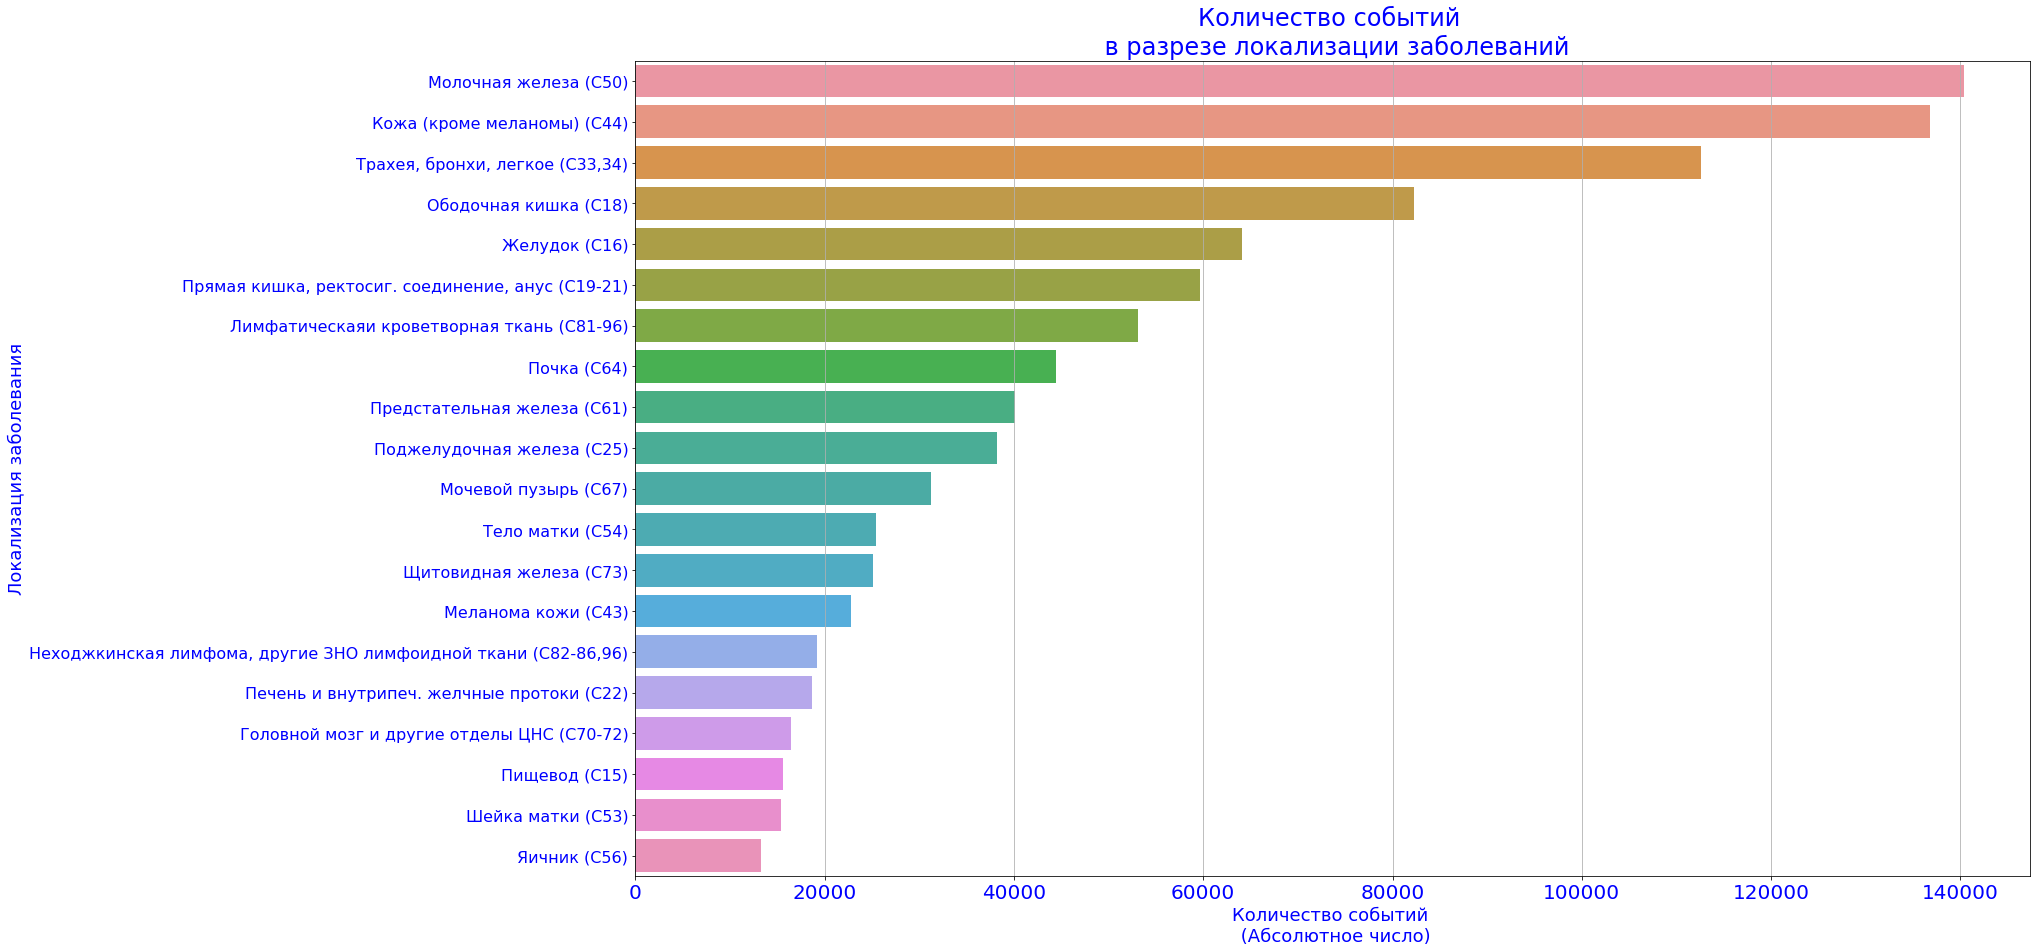

In [14]:
plot_1('Все население', 20)

Мы видим, что лидеры антирейтинга заболеваний - Молочная железа, Кожа и Трахея, бронхи, легкие.  
Учитывая, то заболевание молочной железы характерно в подавляющем большинства случаев для женщин (а для мужчин является скорее аномалией) можно утверждать, что выявление и лечение  этого органа должно вызывть самое первоочереное внимание.

Антирейтинг заболеваний:
- у мужчин
 - трехеи, бронхи, легкие
 - кожа
 - предстательная железа
 - желудок
 - ободочная кишка
- у женщин
 - молочная железа
 - кожа
 - ободочная кишка
 - прямая кишка
 - лимфатическая и кроветворная ткань

Собственно, по указанным выше параметрам целесообразно проводить первичную диагностику для каждого пола пациентов


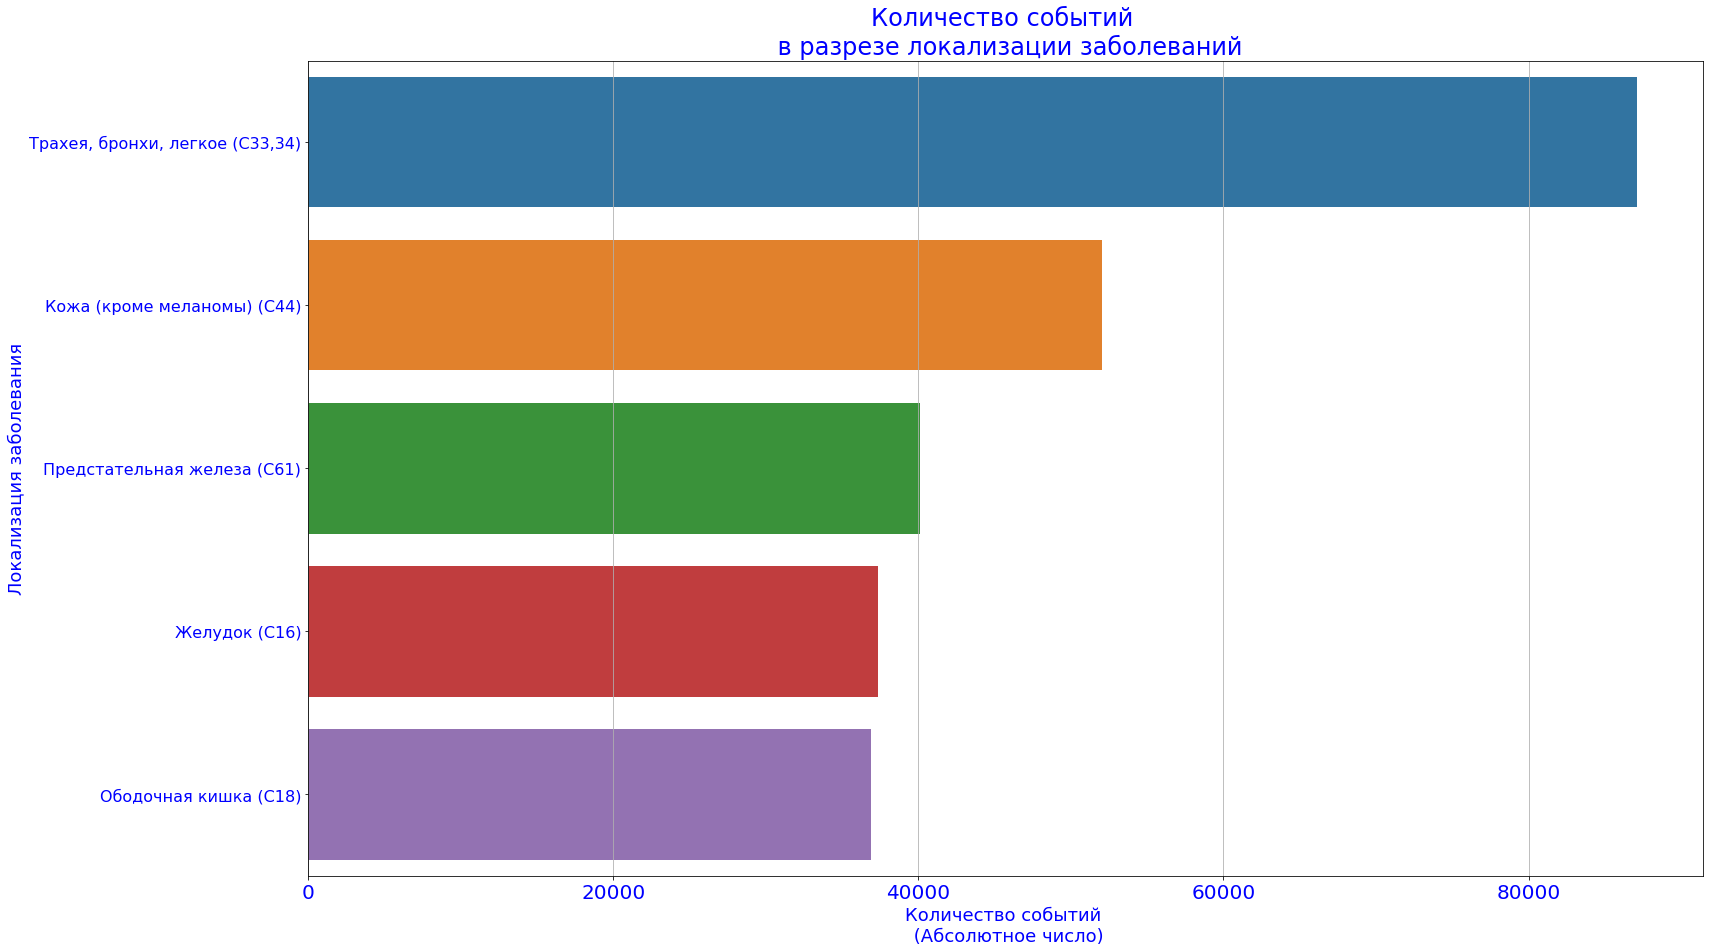

In [15]:
plot_1('Мужчины', 5)

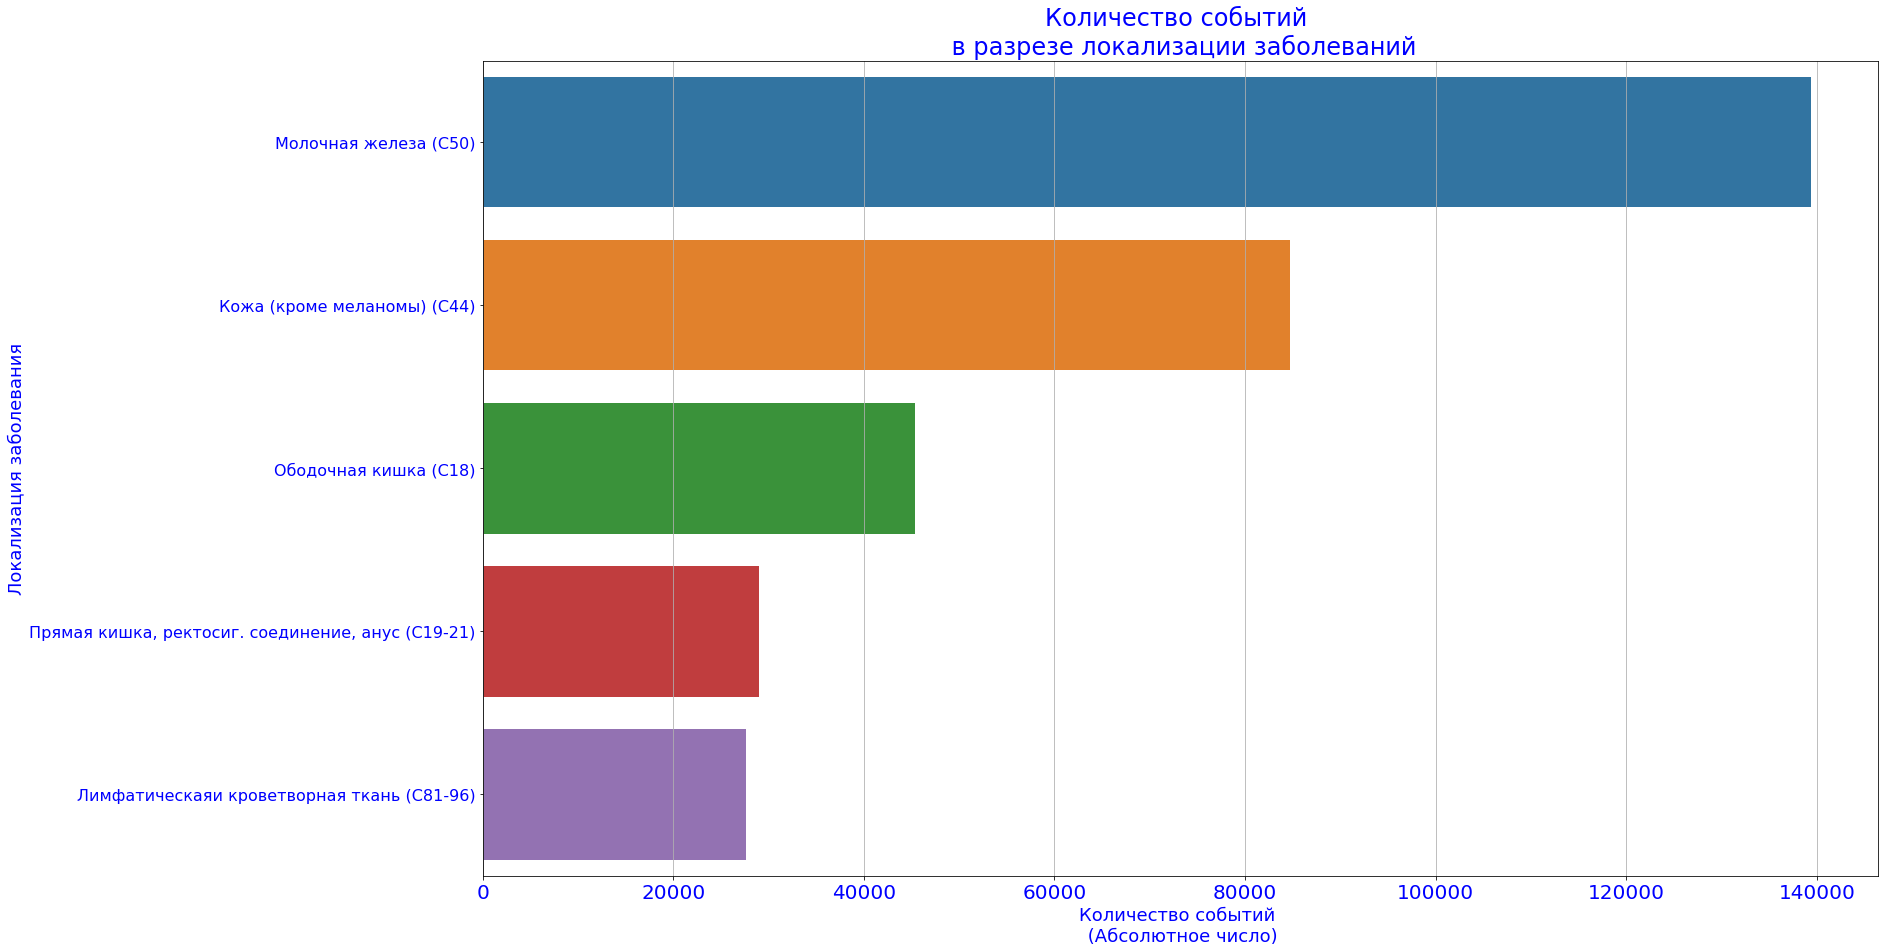

In [16]:
plot_1('Женщины', 5)

Построим аналогичную диаграмму, на этот раз - совместим на одной диаграмме мужчин и женщин.

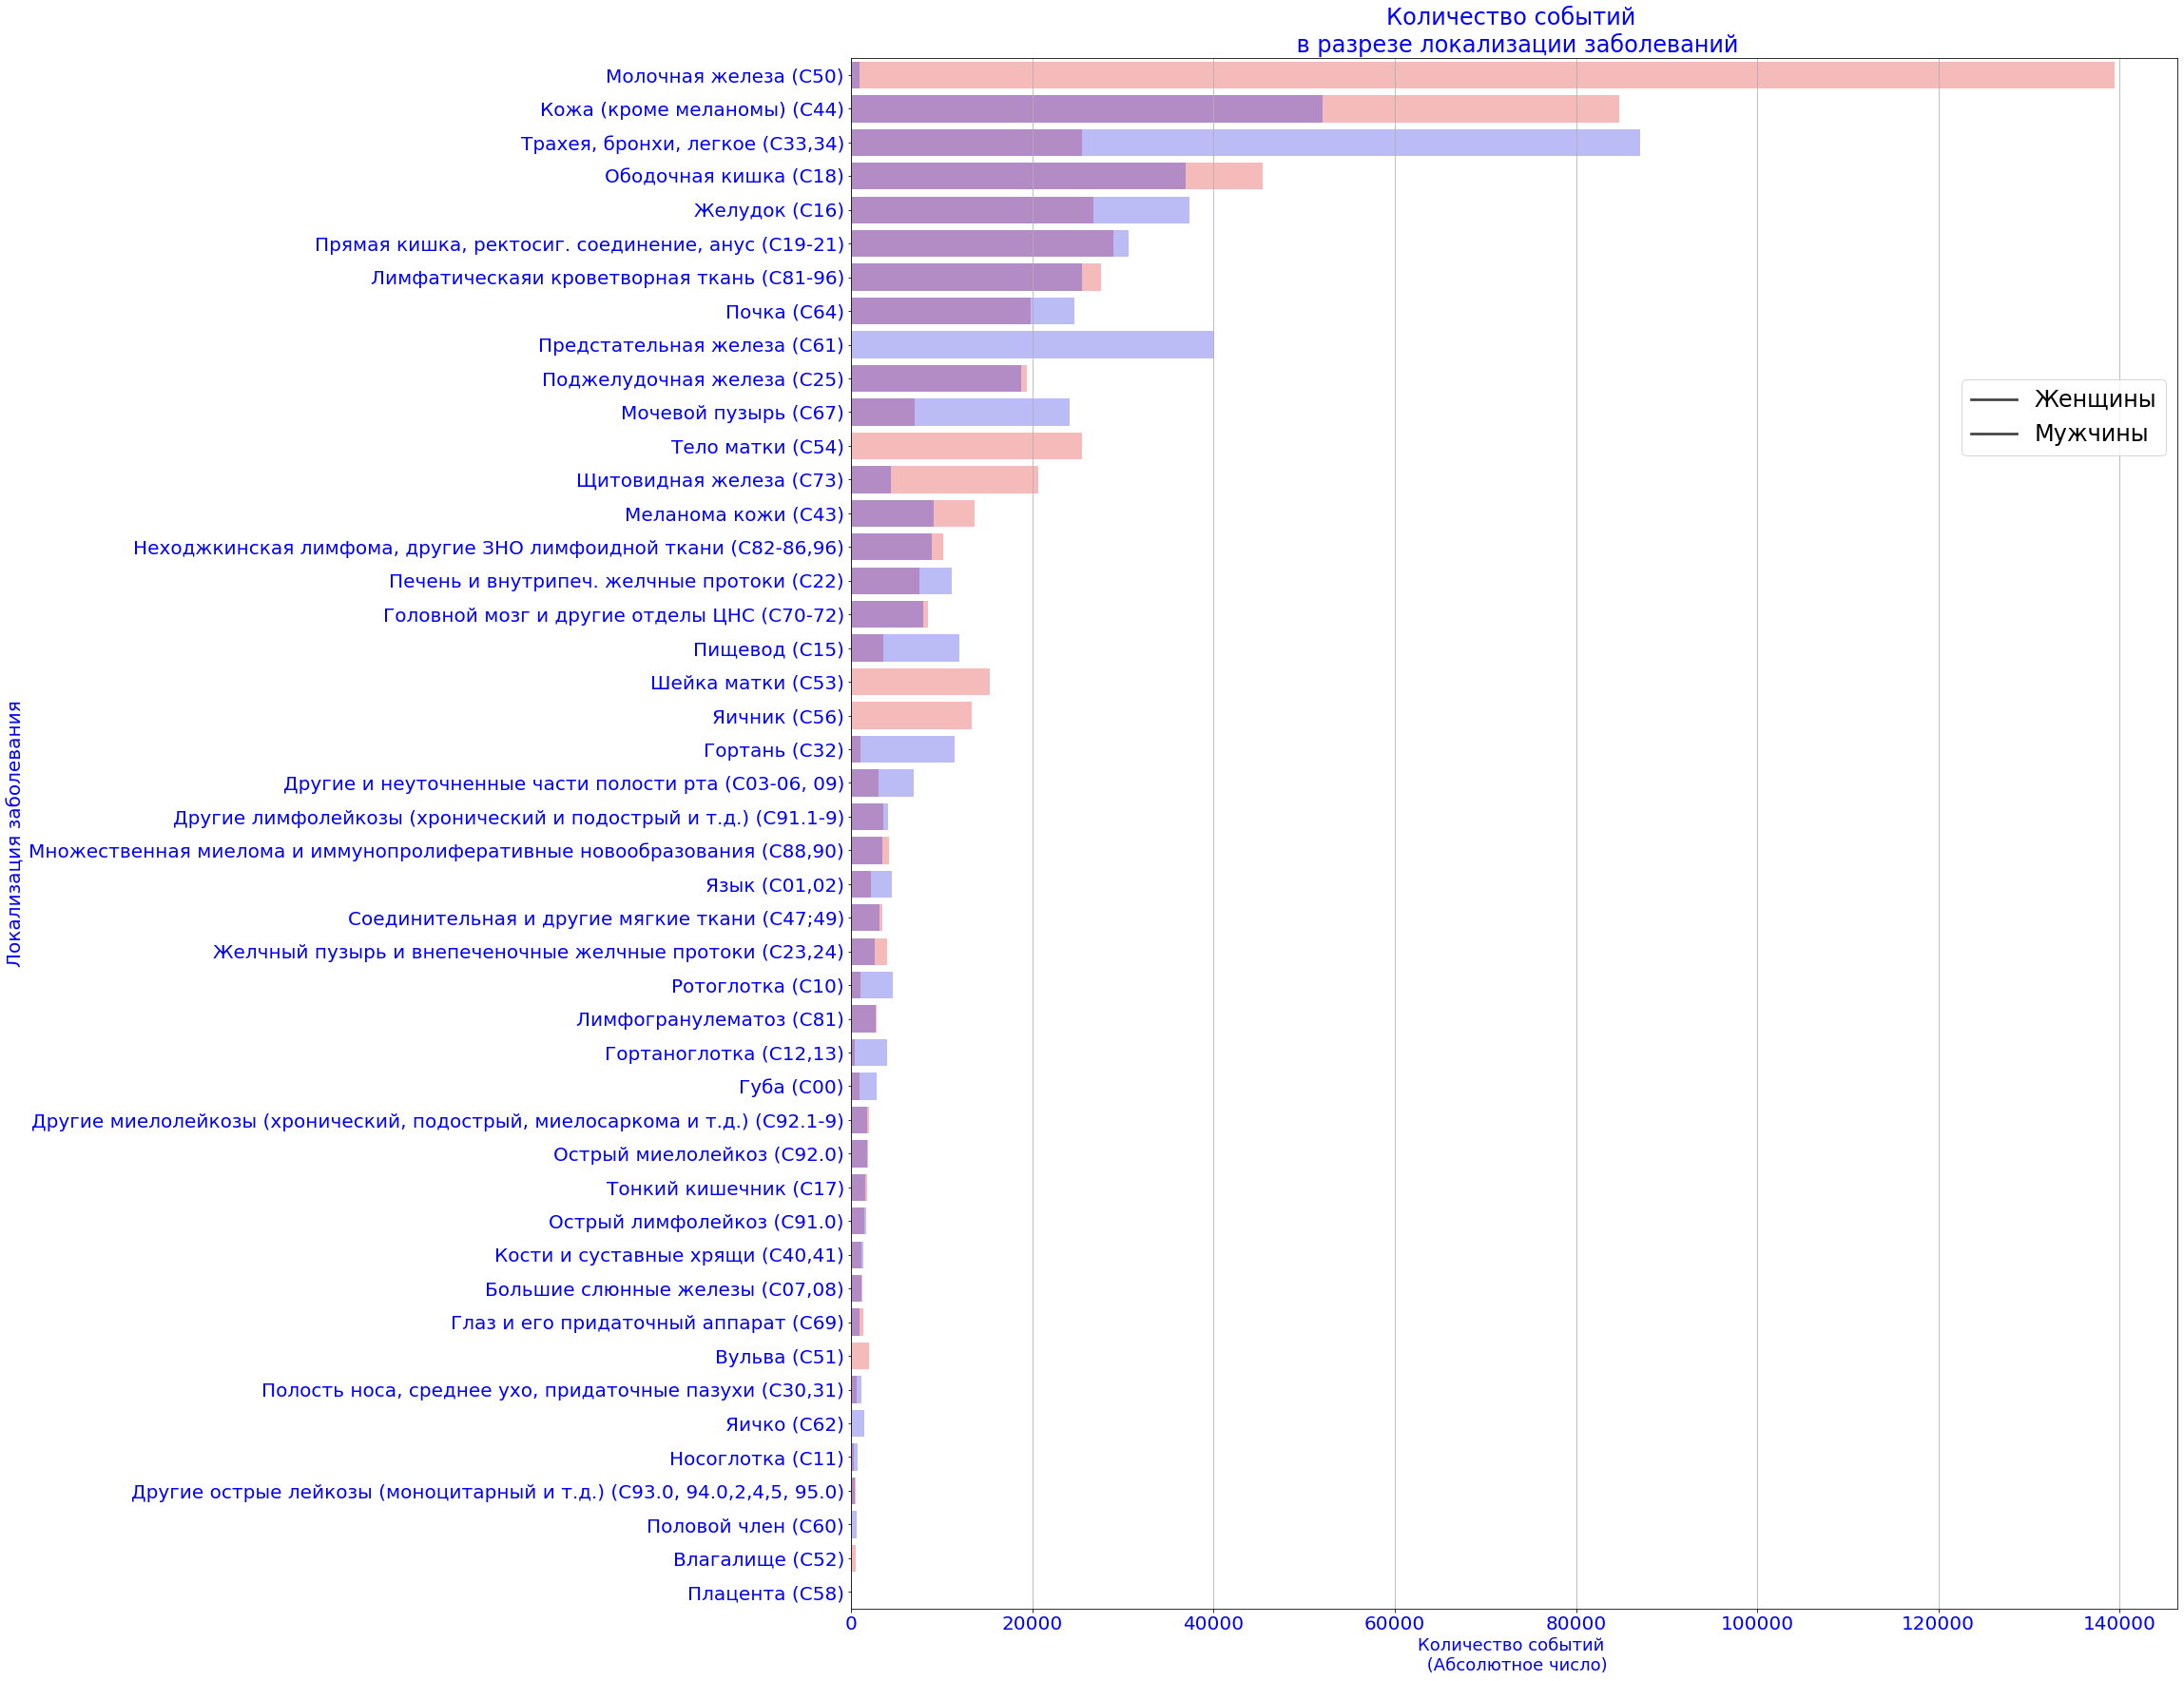

In [31]:
# строим групповую столбчатую диаграмму
plt.figure(figsize=(25, 30))

ax = sns.barplot(y='Локализация', x='Женщины', data=df10, alpha = 0.3, color = 'red') 
sns.barplot(y='Локализация', x='Мужчины', data=df10, ax=ax, alpha = 0.3, color = 'blue') 

plt.title('Количество событий \n в разрезе локализации заболеваний', fontsize=24, color = "b")
plt.legend(['Женщины','Мужчины'],  fontsize=24, bbox_to_anchor=(1, 0.8))

plt.ylabel('Локализация заболевания', fontsize=20, color = "b")
plt.xlabel("Количество событий \n (Абсолютное число)", fontsize=18, color = "b")
plt.grid(which='major', axis='x')


plt.xticks(rotation=0, fontsize=20, color = "b")
plt.yticks(rotation=0, fontsize=20, color = "b")

plt.show()

Дополнительно к вышесказанному нужно отметить, что за исключением локализаций, характерных только для одного их полов:
- у женщин чаще, чем у мужчин, встречаются заболевания:
 - кожи, включая меланому
 - щитовидной железы
 - ободочной кишки
- у мужчин чаще, чем у женщин, встречаются заболевания:
 - трахеи, бронхов, легких (вероятно, это связано с привязанностью к курению табака)
 - мочевого пузыря
 - пищевода



### Заболеваемость молочной железы в разрезе регионов
Мы выявили, что наибольшее количество случае локализации заболевания приходится на молочную железу.  
Давайте посмотрим, как обстоят дела в разрезе регионов.  


Создадим соответствующую переменную и сохраним в нее данные для визуализации

In [18]:

df100 = df1.query('Локализация == "Молочная железа (С50)"').pivot_table(index='Регион',
         #columns='Локализация',
         values='Показатель на 100 тыс. населения, стандартизованный', aggfunc='first').reset_index()

df100 = df100.sort_values('Показатель на 100 тыс. населения, стандартизованный', ascending = False)
df100.columns = ['Регион', 'Показатель']

df100

,Регион,Показатель
10,Город Cевастополь,"36,54"
83,Ярославская область,"36,07"
74,Томская область,"35,22"
78,Хабаровский край,"34,48"
14,Иркутская область,"34,40"
...,...,...
49,Республика Дагестан,"17,79"
57,Республика Саха (Якутия),"17,68"
25,Ленинградская область,"16,75"
30,Ненецкий а.о.,"16,36"


Приведем данные в числовому типу

In [19]:
df100.Показатель = df100.Показатель.replace([','], ['.'], regex=True)


In [20]:
df100.Показатель = pd.to_numeric(df100.Показатель)

In [21]:
df100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 10 to 81
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Регион      86 non-null     object 
 1   Показатель  86 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


Построим диаграмму

In [22]:
# строим групповую столбчатую диаграмму
def plot_2(mark, head_num, head_tail):
    plt.figure(figsize=(25, 40))
    ax = sns.barplot(y='Регион', x=mark, data=df100.sort_values(mark, ascending = False))


    plt.title('Количество событий \n в разрезе локализации заболеваний', fontsize=24, color = "b")

    plt.ylabel('Локализация заболевания', fontsize=18, color = "b")
    plt.xlabel("Количество событий \n (Показатель на 100 тыс. населения)", fontsize=18, color = "b")
    plt.grid(which='major', axis='x')


    plt.xticks(rotation=0, fontsize=20, color = "b")
    plt.yticks(rotation=0, fontsize=16, color = "b")


    plt.show()

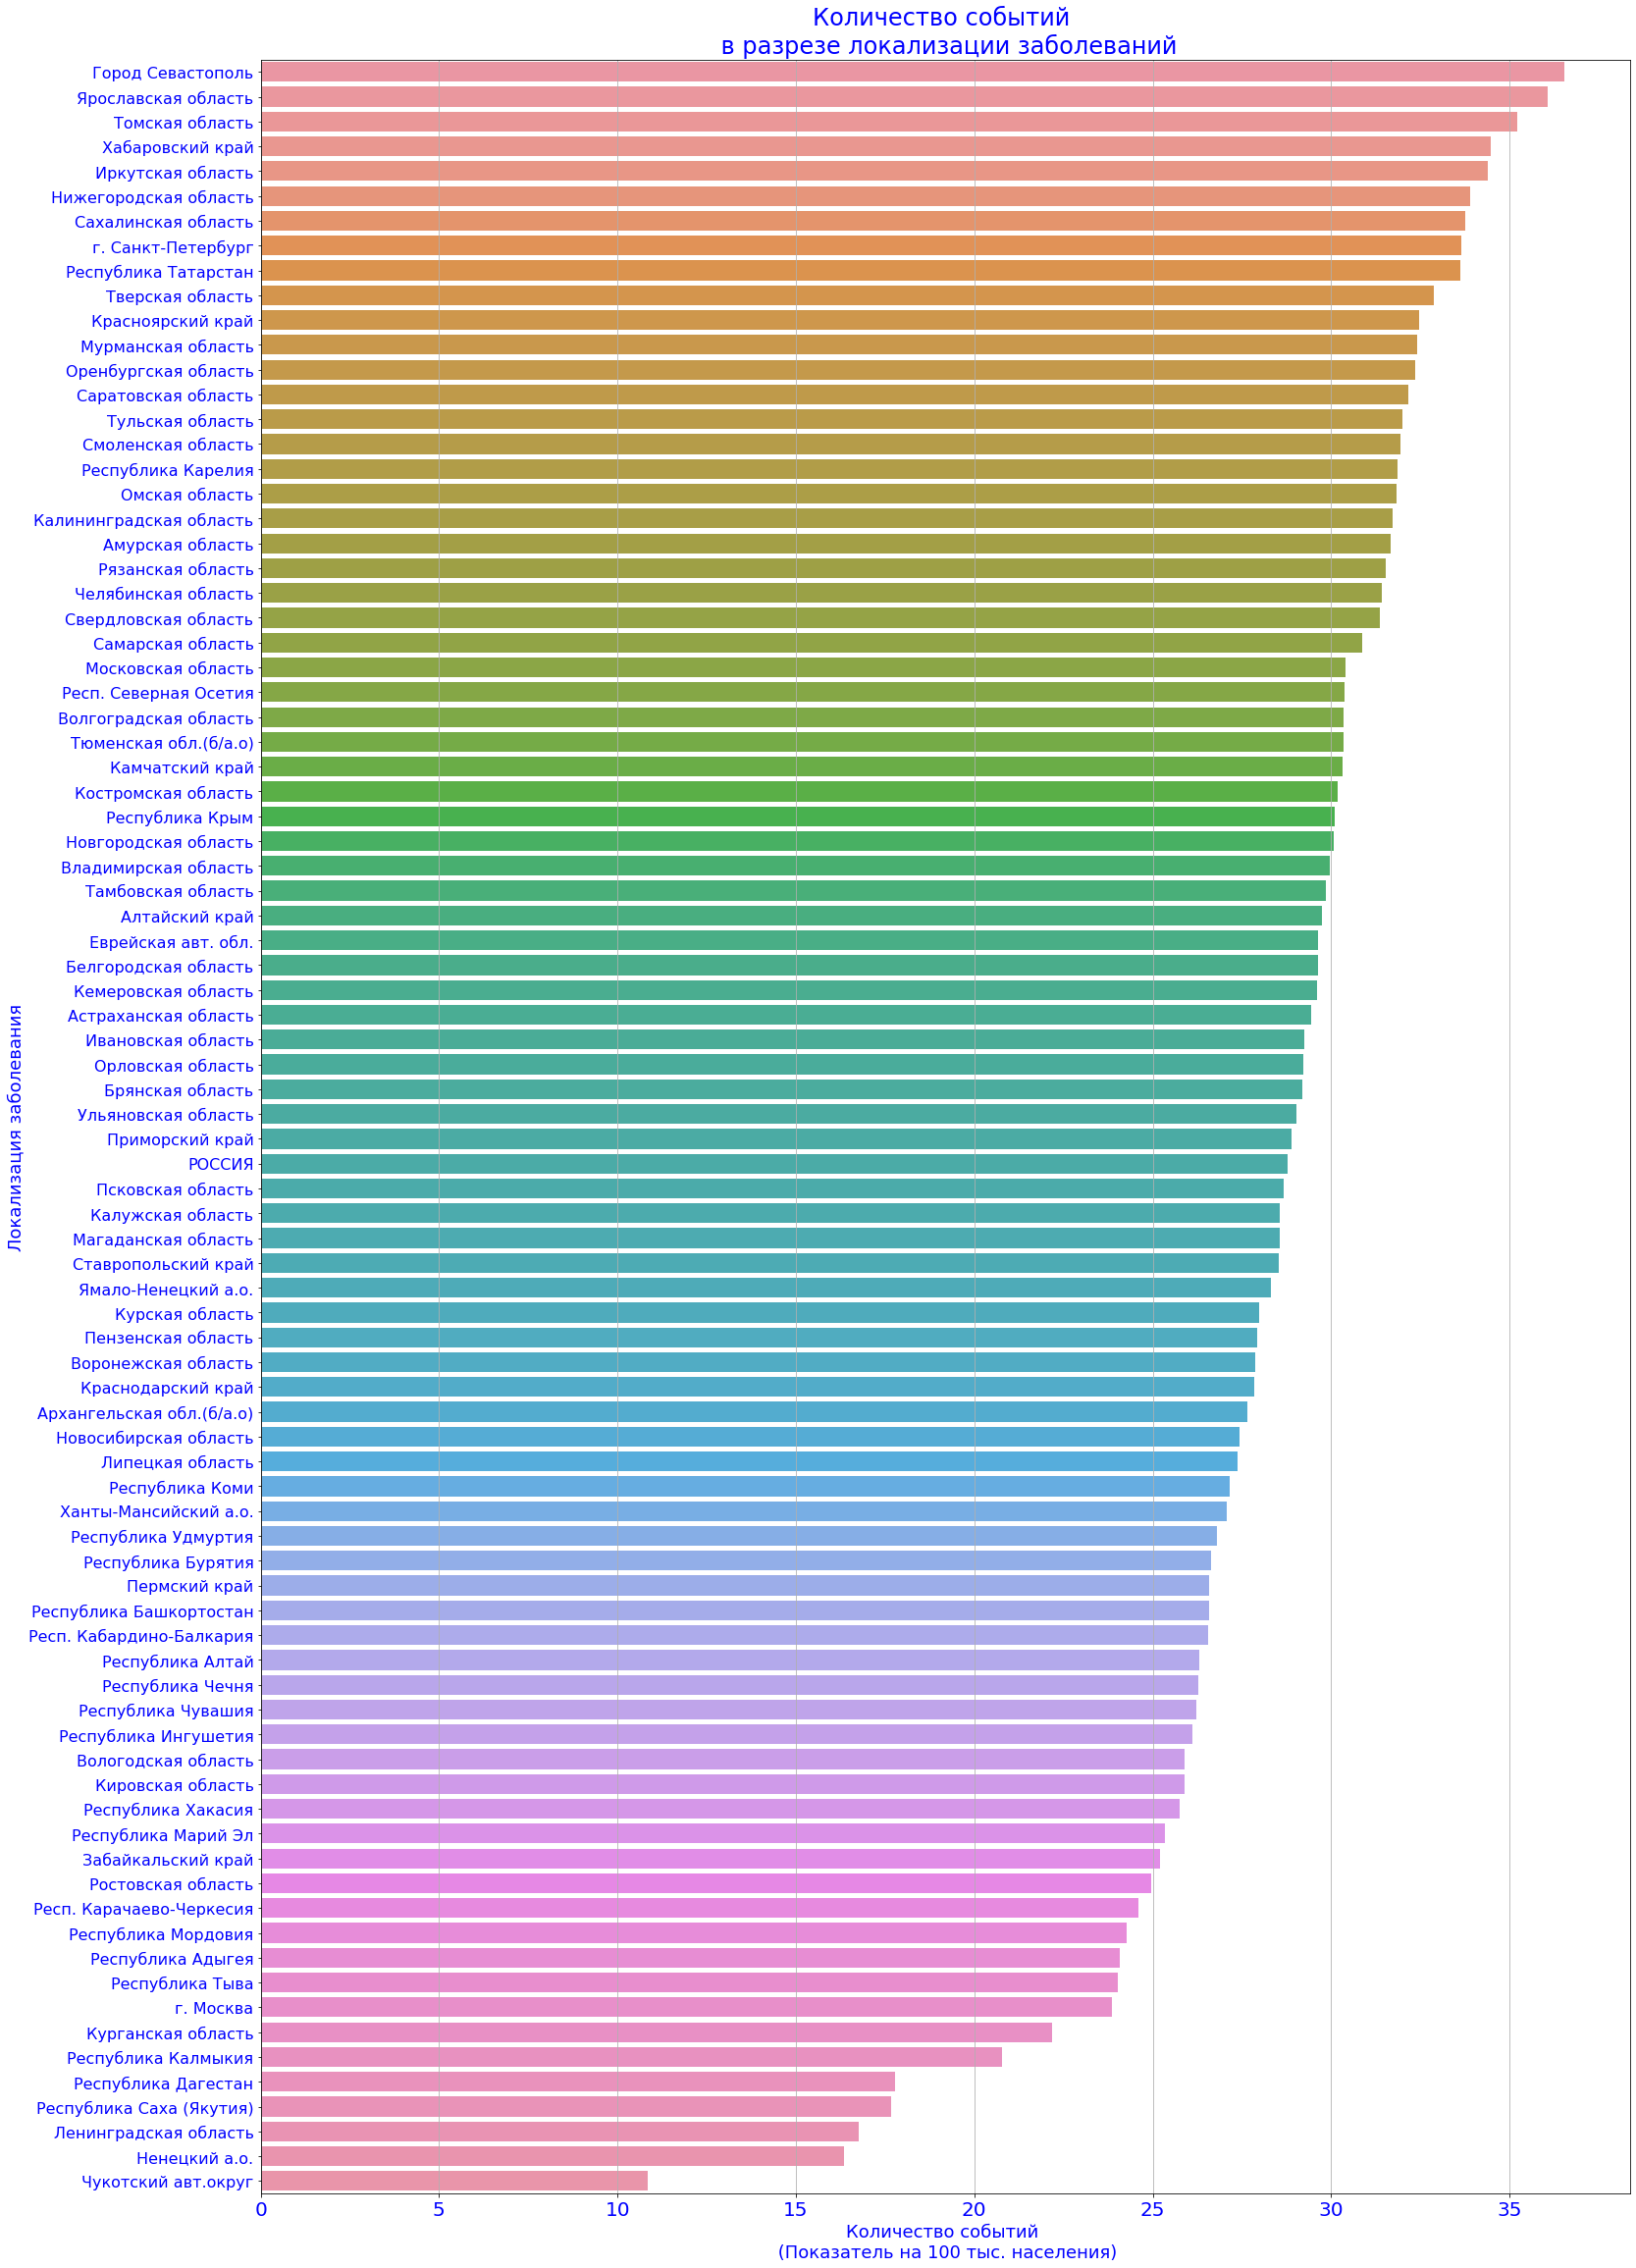

In [23]:
plot_2('Показатель', 30, 'head')

Видим, что разница между максимальным и минимальным значениями весьма значительная - в три раза.  
В данном случае не ставится целью изучение вопроса причины - будь то экология, поставленная работа по диагностике, наличие материальных ресурсов и диагностического оборудования и прочее.  
Хотя возможность сравнить заболеваемость со смертнотью позволит дать некоторые ответы.